<a href="https://colab.research.google.com/github/hectorhh45/tarea_thc1/blob/main/Reino_Unido2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
link= 'https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code = '?raw=true'
url = link+code
df = pd.read_csv(url,sep=',',index_col=1)

In [ ]:
df

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08


In [ ]:
!pip install skforecast

In [ ]:
cuantos=df.groupby("Country").size().reset_index(name="cuantos")
cuantos

,Country,cuantos
0,Guinea,259
1,Italy,141
2,Liberia,364
3,Mali,243
4,Nigeria,255
5,Senegal,254
6,Sierra Leone,259
7,Spain,243
8,United Kingdom,221
9,United States of America,245


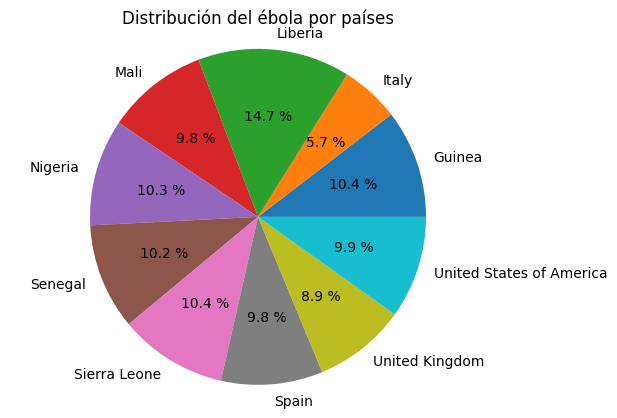

In [ ]:
plt.pie(cuantos["cuantos"],labels=cuantos["Country"],autopct="%0.1f %%")
plt.axis("equal")
plt.title("Distribución del ébola por países")
plt.savefig("Pastel_Países.png",dpi=300,format="png")
plt.show()

In [ ]:
df['Country']=="United Kingdom"
UK=df[df['Country']=="United Kingdom"]
UK

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
02/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
05/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
06/01/2015,United Kingdom,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
07/01/2015,United Kingdom,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
08/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
22/12/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/12/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


In [ ]:
UK.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
02/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
05/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
06/01/2015,United Kingdom,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
07/01/2015,United Kingdom,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
08/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


In [ ]:
UK.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    219
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [ ]:
Dates=UK.index[0:-1:10]
NCC=UK['No. of confirmed cases'][0:-1:10]
NCD=UK['No. of confirmed deaths'][0:-1:10]

In [ ]:
PIvsD=100*UK['No. of confirmed deaths']/UK['No. of confirmed cases']#Porcentaje de Infectados que terminaton en deceso
UK["PIvsD"]=PIvsD

<ipython-input-10-0232244ad041>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK["PIvsD"]=PIvsD


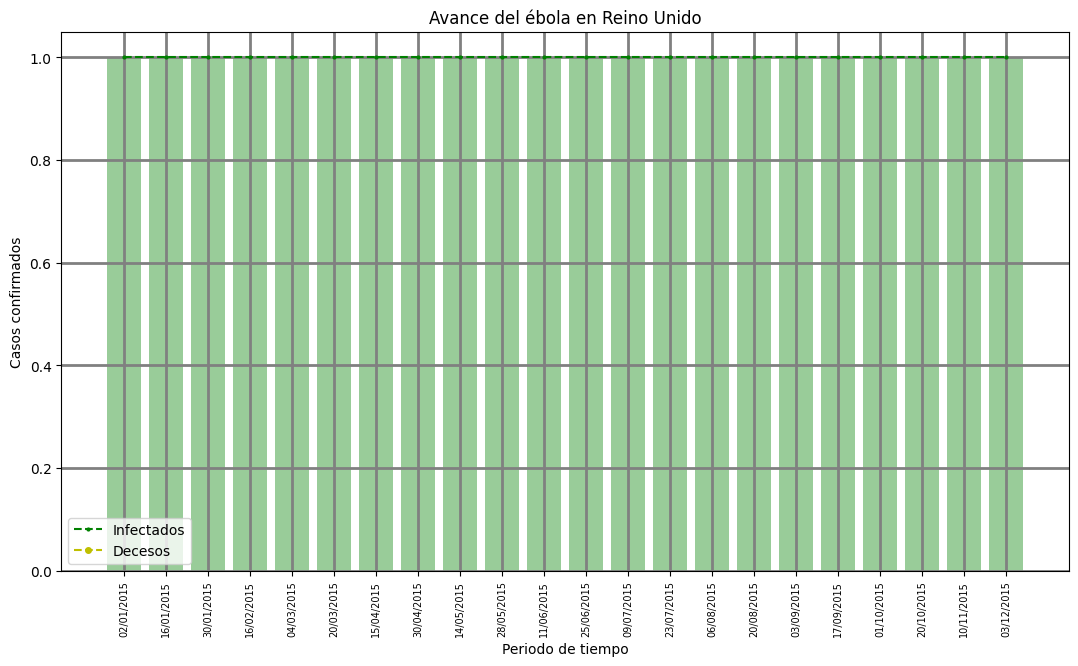

In [ ]:
fig=plt.figure(figsize=(13,7))
plt.plot(Dates,NCC,"o--g",ms=2,label="Infectados")
plt.bar(Dates,NCC,color='green',alpha=0.4)
plt.plot(Dates,NCD,'o--y',ms=4,label='Decesos')
plt.bar(Dates,NCD,color='yellow',alpha=0.3)
plt.grid(color="gray",linewidth="2",ms=20)
plt.title("Avance del ébola en Reino Unido")
plt.ylabel("Casos confirmados")
plt.xlabel("Periodo de tiempo")
plt.xticks(rotation=90,fontsize=7)#Fechas rotadas y tamaño de las fechas.
plt.legend()
plt.savefig("infectadosydecesos.png",dpi=300,format='png')
plt.show()

In [ ]:
UK.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,,
02/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,NaN
05/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,NaN
06/01/2015,United Kingdom,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
07/01/2015,United Kingdom,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,0.0
08/01/2015,United Kingdom,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04,NaN


In [ ]:
#Cantidad de los recuperados
recuperados=((100-PIvsD)/100)*UK['No. of confirmed cases']
UK["recuperados"]=recuperados

#Porcentaje de recuperados
UK["PR"]=(100-PIvsD)

<ipython-input-13-d39fe3d41493>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK["recuperados"]=recuperados
<ipython-input-13-d39fe3d41493>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK["PR"]=(100-PIvsD)


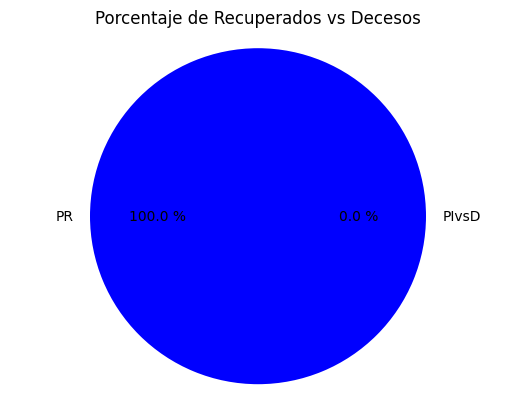

In [ ]:
PIvsD_mean=UK["PIvsD"].mean()
PR_mean=UK["PR"].mean()
porcentajes=[PIvsD_mean,PR_mean]
etiquetas=["PIvsD","PR"]

plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=["gray","blue"])
plt.axis("equal")
plt.title("Porcentaje de Recuperados vs Decesos")
plt.show()

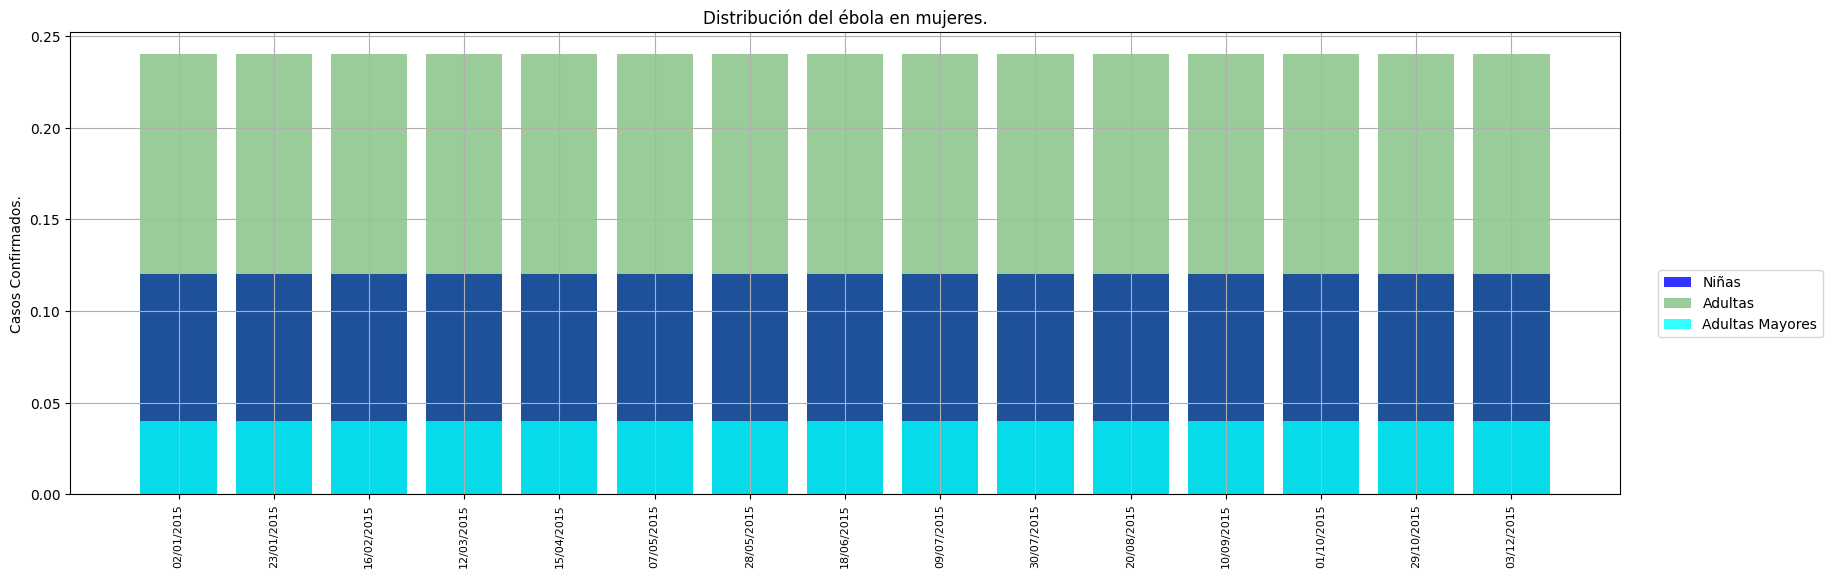

In [ ]:
G=UK["Girls"][0:-1:15]
AF=UK["Adult Female"][0:-1:15]
OF=UK["Old Female"][0:-1:15]
Dates=UK.index[0:-1:15]
fig=plt.figure(figsize=(20,6))
plt.bar(Dates,G,color="blue",alpha=0.8,label="Niñas")
plt.bar(Dates,AF,color="green",alpha=0.4,label="Adultas")
plt.bar(Dates,OF,color="cyan",alpha=0.8,label="Adultas Mayores")
plt.grid()
plt.title("Distribución del ébola en mujeres.")
plt.ylabel("Casos Confirmados.")
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,0.5))
plt.savefig("Ébolaenmujeres.png",dpi=300,format="png")
plt.show()

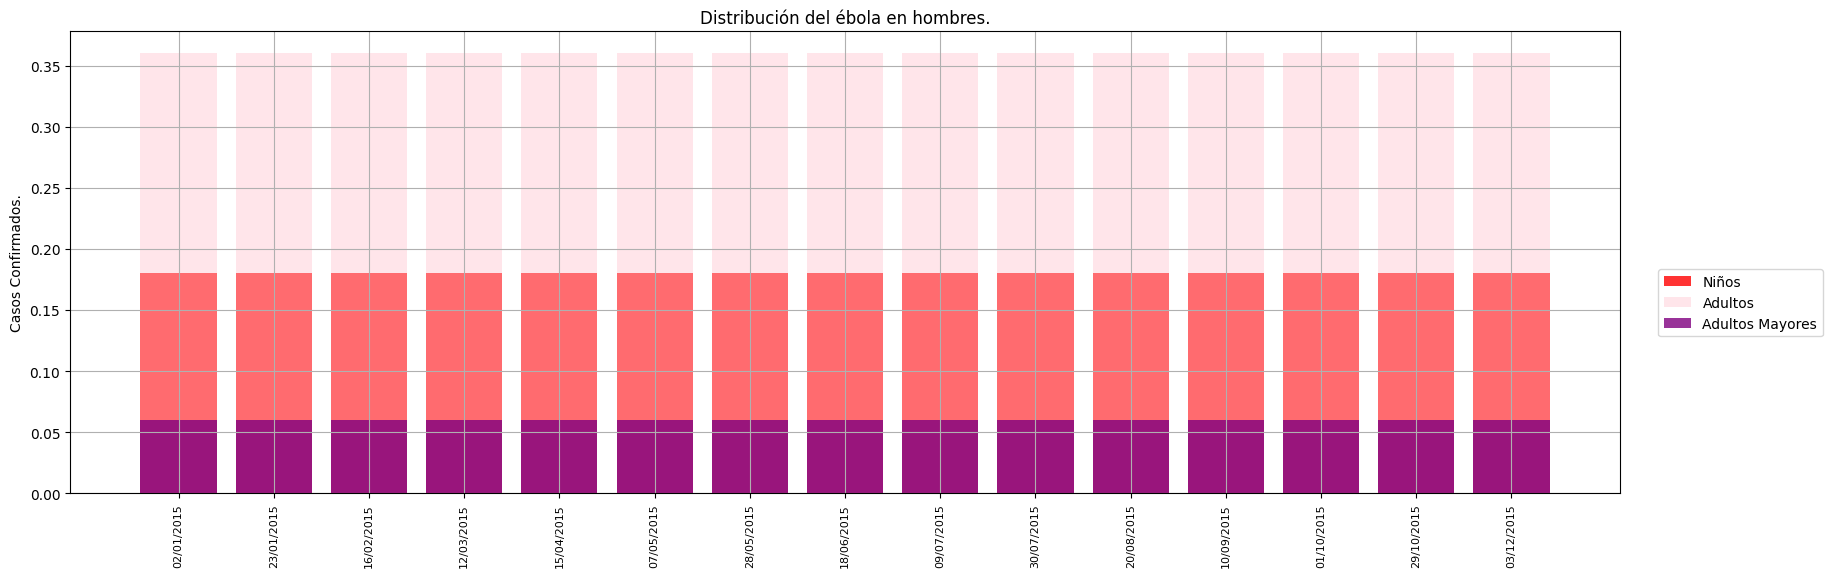

In [ ]:
G=UK["Boys"][0:-1:15]
AF=UK["Adult Male"][0:-1:15]
OF=UK["Old Male"][0:-1:15]
Dates=UK.index[0:-1:15]
fig=plt.figure(figsize=(20,6))
plt.bar(Dates,G,color="red",alpha=0.8,label="Niños")
plt.bar(Dates,AF,color="pink",alpha=0.4,label="Adultos")
plt.bar(Dates,OF,color="purple",alpha=0.8,label="Adultos Mayores")
plt.grid()
plt.title("Distribución del ébola en hombres.")
plt.ylabel("Casos Confirmados.")
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,0.5))
plt.savefig("Ébolaenhombres.png",dpi=300,format="png")
plt.show()

In [ ]:
Boys=UK["Boys"].to_numpy()
UK_Boys=pd.DataFrame({"Boys":Boys})
UK_Boys.index=pd.to_datetime(UK.index,format="%d/%m/%Y")
#ordenar fechas UK_Boys=UK.Boys.sort.index()

In [ ]:
UK_Boys

,Boys
Date,
2015-01-02,0.18
2015-01-05,0.18
2015-01-06,0.18
2015-01-07,0.18
2015-01-08,0.18
...,...
2015-12-17,0.18
2015-12-22,0.18
2015-12-23,0.18


In [ ]:
steps=57

data_train=UK_Boys[:-steps]
data_test=UK_Boys[-steps:]

In [ ]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 164


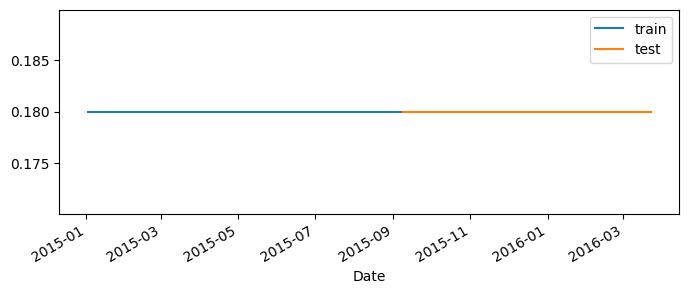

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
data_train["Boys"].plot(ax=ax,label="train")
data_test["Boys"].plot(ax=ax,label="test")
ax.legend()
plt.show()

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

forecaster=ForecasterAutoreg(
  regressor=RandomForestRegressor(random_state=123),
  lags=6
)

forecaster.fit(y=data_train["Boys"]) #predecir los datos

steps=57 #pedir los 57 datos que hbaía seleccionado
predicciones=forecaster.predict(steps=steps) #pronostica 57 pasos en el futuro

predicciones.index=data_test.index

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


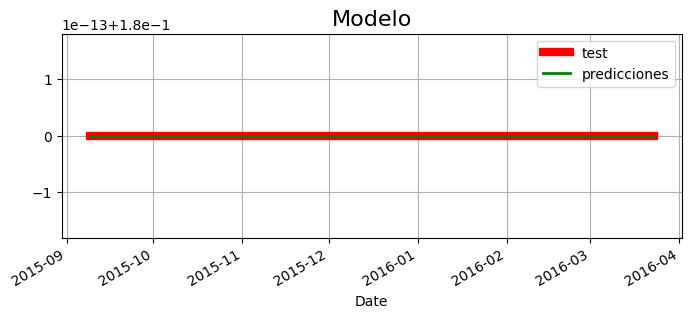

In [ ]:
fig,ax=plt.subplots(figsize=(8,3))
#data_train["Boys"].plot(ax=ax,label="train")
data_test["Boys"].plot(ax=ax,label="test",lw=6,color="red") #datos reales
predicciones.plot(ax=ax,label="predicciones",lw=2,color="green") #datos calculados
ax.legend()
plt.grid()
plt.title("Modelo",fontsize=16)
plt.savefig("Datoscalculados.png",dpi=300,format="png")
plt.show()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

UK_girls=UK["Girls"]
UK_girls=pd.DataFrame(UK_girls)
future_days=50
UK_girls["Prediction"]=UK_girls["Girls"].shift(-future_days)

UK_girls.tail()

,Girls,Prediction
Date,,
17/12/2015,0.12,NaN
22/12/2015,0.12,NaN
23/12/2015,0.12,NaN
29/12/2015,0.12,NaN
23/03/2016,0.12,NaN


In [ ]:
X = np.array(UK_girls.drop(["Prediction"],1))[:-future_days]#deje libres los últimos 50
X.shape
y = np.array(UK_girls["Prediction"])[:-future_days]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
tree = DecisionTreeRegressor().fit(x_train,y_train) #Entrenarlo para obtener los valores que necesito pronosticados
lr = LinearRegression().fit(x_train,y_train)
x_future = UK_girls.drop(["Prediction"],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future.shape
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]


<ipython-input-26-0b21921d30ff>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(UK_girls.drop(["Prediction"],1))[:-future_days]#deje libres los últimos 50
<ipython-input-26-0b21921d30ff>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = UK_girls.drop(["Prediction"],1)[:-future_days]


In [ ]:
predictions = tree_prediction
valid = UK_girls[X.shape[0]:]
valid

,Girls,Prediction
Date,,
18/09/2015,0.12,NaN
21/09/2015,0.12,NaN
22/09/2015,0.12,NaN
23/09/2015,0.12,NaN
24/09/2015,0.12,NaN
25/09/2015,0.12,NaN
28/09/2015,0.12,NaN
29/09/2015,0.12,NaN
30/09/2015,0.12,NaN


In [ ]:
valid['Predictions'] = predictions
valid

<ipython-input-28-d3e11ce66c00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Girls,Prediction,Predictions
Date,,,
18/09/2015,0.12,NaN,0.12
21/09/2015,0.12,NaN,0.12
22/09/2015,0.12,NaN,0.12
23/09/2015,0.12,NaN,0.12
24/09/2015,0.12,NaN,0.12
25/09/2015,0.12,NaN,0.12
28/09/2015,0.12,NaN,0.12
29/09/2015,0.12,NaN,0.12
30/09/2015,0.12,NaN,0.12


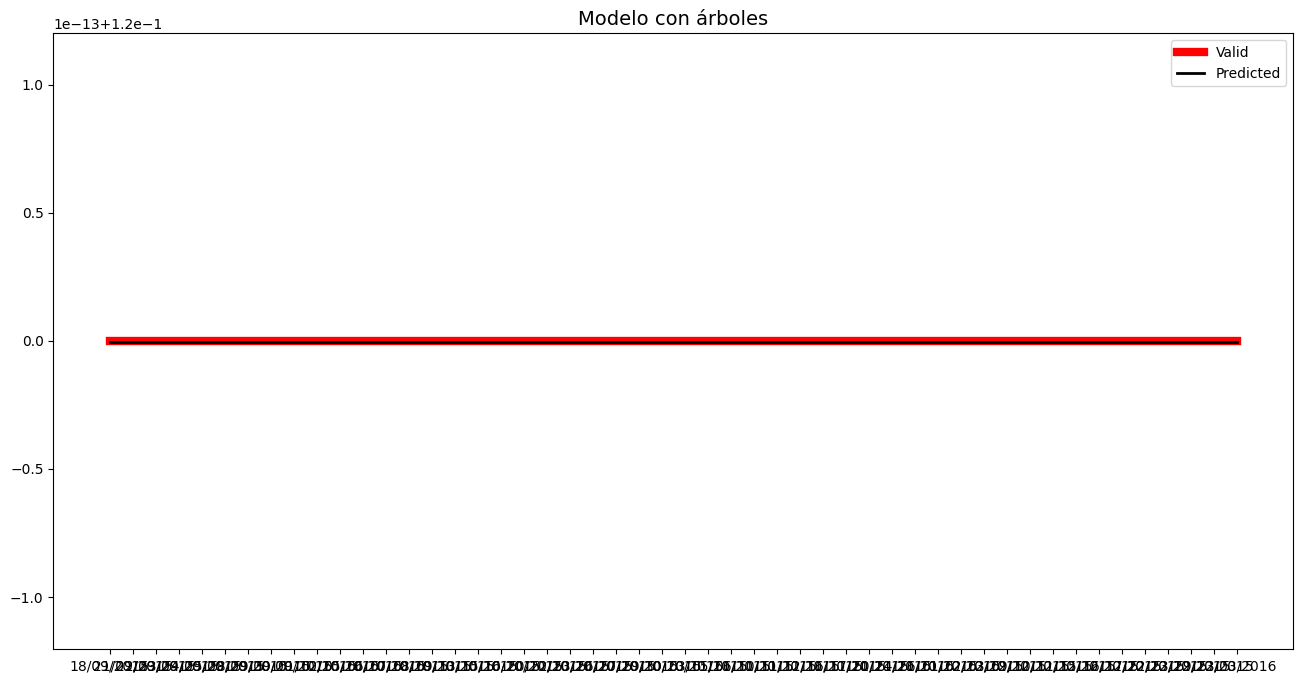

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Modelo con árboles",fontsize=14)
plt.plot(valid['Girls'],'-r',lw=6)
plt.plot(valid['Predictions'],'-k',lw=2)
plt.legend([ "Valid", 'Predicted'])
plt.show()